# Artificial and Computational Intelligence

## Uninformed & Informed Search

1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

Performance Measure:
The performance measure in this problem can be defined as the minimum number of network connections required to keep the network up and running while minimizing the total transmission cost. The goal is to find a subset of connections that ensures uninterrupted communication while minimizing the overall cost.

Environment:
The environment in this problem is a network infrastructure consisting of shared and distributed servers placed at various locations in the city. The nodes represent the servers, and the edges represent the communication lines between them. The edge costs depict the approximate transmission cost between each pair of nodes.

Actuators:
The actuators in this problem are the network connections between the nodes. The objective is to select a subset of connections to keep the network functioning with minimum interruption.

Sensors:
The sensors in this problem provide information about the network structure, including the nodes and the edges (communication lines) between them. The edge costs provide information about the transmission cost between each pair of nodes.

Design the agent as PSA Agent(Problem Solving Agent) 
Clear Initial data structures to define the graph and variable declarations is expected 
IMPORTATANT: Write distinct code block as below

Enter the start node: A
Enter the goal node: H


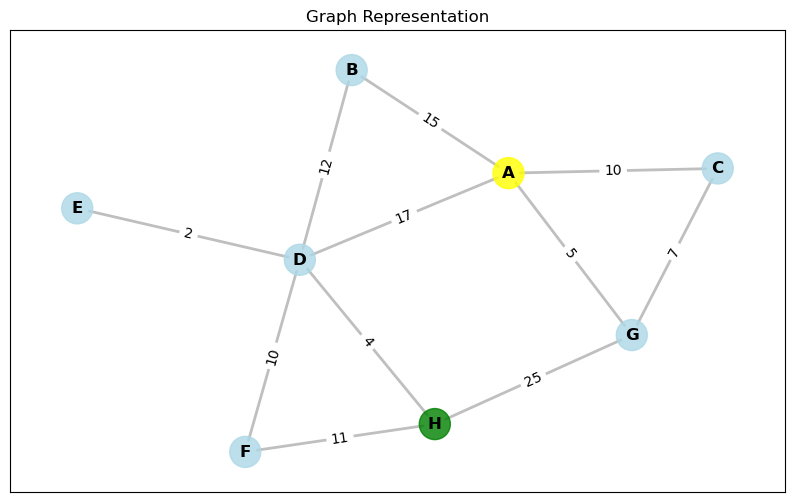

In [384]:
#Code Block : Set Initial State (Must handle dynamic inputs)
#This block initializes the graph as given in the problem statement and prints it.Takes input from user for start node and goal node
#Start node is printed in yellow and Goal node is printed in Green

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time
import sys

# Define the graph as an adjacency list
graph = {
    'A': {'B': 15, 'C': 10, 'D': 17, 'G': 5},
    'B': {'A': 15, 'D': 12},
    'C': {'A': 10, 'G': 7},
    'D': {'A': 17, 'B': 12, 'E': 2, 'F': 10, 'H': 4},
    'E': {'D': 2},
    'F': {'D': 10, 'H': 11},
    'G': {'A': 5, 'C': 7, 'H': 25},
    'H': {'D': 4, 'F': 11, 'G': 25}
}

# Get user input for start and goal nodes
start_node = input("Enter the start node: ")
goal_node = input("Enter the goal node: ")

# Create a NetworkX graph from the adjacency list
G = nx.Graph(graph)

# Set colors for nodes

# Set colors for nodes
node_colors = ['lightblue'] * len(G.nodes)
node_colors[list(G.nodes).index(start_node)] = 'yellow'
node_colors[list(G.nodes).index(goal_node)] = 'green'

# Set labels for nodes
node_labels = {node: node for node in sorted(G.nodes)}

# Set edge labels
edge_labels = {(u, v): str(graph[u][v]) for u, v in G.edges}

# Draw the graph with customized settings
plt.figure(figsize=(10, 6))  # Set the figure size

pos = nx.kamada_kawai_layout(G)  # Set the layout algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Graph Representation")
plt.show()

### 2.	Definition of Algorithm 1 (Mention the Name of the algorithm here eg., UNINFORMED SEARCH - BREADTH FIRST SEARCH)

In [385]:
#Code Block : Function for algorithm 1 implementation - BREADTH FIRST SEARCH

# Function to perform Breadth First Search
def bfs(graph, start, goal):
    # Initialize the queue for BFS
    queue = deque()
    # Enqueue the start node and mark it as visited
    queue.append((start, [start], 0))
    visited = set(start)

    # Print the headers for the iteration log
    print(f"{'Iteration':<10} {'Open List':<40} {'Closed List':<40} {'Goal Test'}")
    print("-" * 110)

    open_list = []  # Keep track of open lists of previous iterations
    closed_list = []  # Keep track of closed lists of previous iterations
    iteration = 1

    while queue:
        # Dequeue the current node, path, and path cost
        current_node, path, path_cost = queue.popleft()

        # Print the current iteration details
        open_list.append('(' + ', '.join([node for node, _, _ in queue]) + ')')
        closed_list.append('(' + ', '.join(path) + ')')
        print(f"{iteration:<10} {', '.join(open_list):<40} {', '.join(closed_list):<40} {current_node == goal}")

        # Check if the goal node is reached
        if current_node == goal:
            # Return the path and path cost to the goal node
            return path, path_cost

        # Enqueue the unvisited neighboring nodes
        for neighbor, cost in graph[current_node].items():
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor], path_cost + cost))
                visited.add(neighbor)

        iteration += 1

    # If goal node is not found, return None
    return None, None

### 3.	Definition of Algorithm 2 (Mention the Name of the algorithm here eg., INFORMED SEARCH - A*)

In [386]:
#Code Block : Functions for algorithm 2 (RBFS) implementation.
#Function to compute the heuristic value of each node for a given goal node. 
#Computed heuristic values will be used in RBFS search algorithm defined in next block

def compute_heuristic():
    def calculate_average_cost(paths):
        total_cost = 0
        total_paths = 0
        print("\nPossible Paths to goal node. Average of possible path costs will be the heuristic value for this node\n")
        for path in paths:
            path_cost = sum(graph[path[i]][path[i+1]] for i in range(len(path)-1))
            total_cost += path_cost
            total_paths += 1
            print(f"{start_node}\t{goal_node}\t{' -> '.join(path)} ({path_cost})")
        return total_cost / total_paths if total_paths > 0 else float('inf')

    G = nx.Graph(graph)  # Convert the dictionary to a graph object
    heuristic_values = {}
    for start_node in G.nodes:
        paths = nx.all_simple_paths(G, start_node, goal_node)
        heuristic_values[start_node] = calculate_average_cost(paths)
    print("\nHeuristic Values\n")
    for node, value in heuristic_values.items():
        print(f"{node}: {value}")
    return heuristic_values

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question. We have already got the start node and goal node input in the first block. We have done in first block to use same start and goal node throughout the program. We can move the code block to anywhere depending on the need.

In [387]:
#Code Block : Functions for algorithm 2 (RBFS) implementation using priority queue. Computed heuristic values are 
#passed as one of the input argument.

import heapq

def recursive_best_first_search(start_node, goal_node, heuristic_values):
    # Priority queue to store nodes based on their evaluation function (heuristic + path cost)
    priority_queue = [(heuristic_values[start_node], start_node, [start_node], 0)]
    iteration = 0
    open_list_prev = []
    closed_list_prev = []
    nodes_explored = 0

    while priority_queue:
        _, node, path, path_cost = heapq.heappop(priority_queue)
        nodes_explored += 1

        if node == goal_node and (not priority_queue or priority_queue[0][0] > heuristic_values[node]):
            open_list_prev.append([])
            closed_list_prev.append(goal_node)
            iteration += 1

            # Print headers for the iteration log for debugging purpose
            #if iteration == 1:
                #print(f"{'Iteration':<15} {'Open List':<120} {'Closed List':<120} {'Goal Test'} {'Nodes Explored'}")
                #print("-" * 285)

            for i in range(iteration):
                open_list_str = ", ".join(f"({', '.join(open_list_prev[i])})") if open_list_prev[i] else ""
                closed_list_str = ", ".join(f"({', '.join(closed_list_prev[i])})") if closed_list_prev[i] else ""
                goal_test = goal_node in closed_list_prev[i]
                #print(f"{i + 1:<15} {open_list_str:<120} {closed_list_str:<120} {goal_test} {nodes_explored}")

            print("Explored Nodes:", ', '.join(path))
            return path, path_cost

        successors = graph[node]
        if successors:
            sorted_successors = sorted(successors, key=lambda x: heuristic_values[x] + graph[node][x])
            open_list = [successor for successor in sorted_successors if successor not in path]
            open_list_prev.append([f"{successor}({heuristic_values[successor]})" for successor in open_list])
            closed_list_prev.append(f"{node}({heuristic_values[node]})")
            iteration += 1

            for successor in open_list:
                new_f = heuristic_values[successor] + graph[node][successor]
                new_path = path + [successor]
                new_path_cost = path_cost + graph[node][successor]
                heapq.heappush(priority_queue, (new_f, successor, new_path, new_path_cost))

    return None, 0

### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

Iteration  Open List                                Closed List                              Goal Test
--------------------------------------------------------------------------------------------------------------
1          ()                                       (A)                                      False
2          (), (C, D, G)                            (A), (A, B)                              False
3          (), (C, D, G), (D, G)                    (A), (A, B), (A, C)                      False
4          (), (C, D, G), (D, G), (G)               (A), (A, B), (A, C), (A, D)              False
5          (), (C, D, G), (D, G), (G), (E, F, H)    (A), (A, B), (A, C), (A, D), (A, G)      False
6          (), (C, D, G), (D, G), (G), (E, F, H), (F, H) (A), (A, B), (A, C), (A, D), (A, G), (A, D, E) False
7          (), (C, D, G), (D, G), (G), (E, F, H), (F, H), (H) (A), (A, B), (A, C), (A, D), (A, G), (A, D, E), (A, D, F) False
8          (), (C, D, G), (D, G), (G), (E, F, H), (F, H

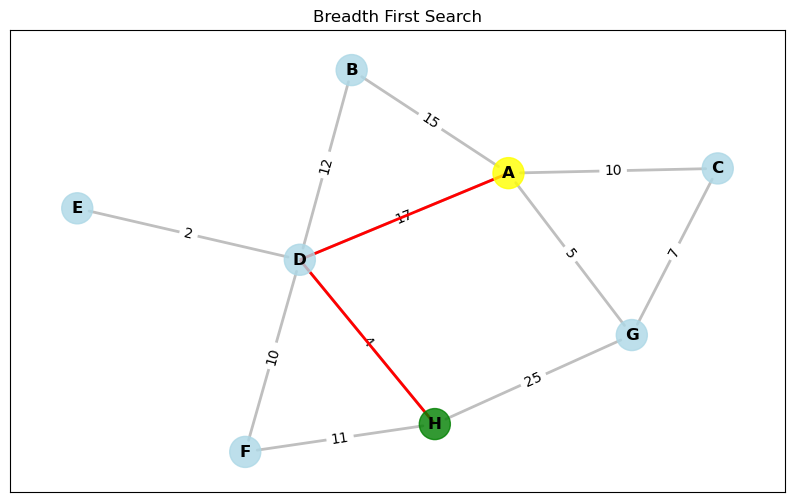

In [388]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))

# Perform BFS and print the path, open and closed lists for each iteration, final path & path cost
path, path_cost = bfs(graph, start_node, goal_node)
if path:
    print("\nPath Found:", path)
    print("Path Cost:", path_cost)
else:
    print("\nNo path found.")
    
# Create a NetworkX graph from the adjacency list
nx_graph = nx.Graph(graph)

# Set labels for nodes
node_labels = {node: node for node in sorted(G.nodes)}

# Set edge labels
edge_labels = {(u, v): str(graph[u][v]) for u, v in G.edges}

# Draw the graph with customized settings
plt.figure(figsize=(10, 6))  # Set the figure size

pos = nx.kamada_kawai_layout(G)  # Set the layout algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Highlight the path
highlighted_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(nx_graph, pos, edgelist=highlighted_edges, edge_color='red', width=2)

# Show the graph on the screen
plt.title("Breadth First Search")
plt.show()


Possible Paths to goal node. Average of possible path costs will be the heuristic value for this node

A	H	A -> B -> D -> F -> H (48)
A	H	A -> B -> D -> H (31)
A	H	A -> C -> G -> H (42)
A	H	A -> D -> F -> H (38)
A	H	A -> D -> H (21)
A	H	A -> G -> H (30)

Possible Paths to goal node. Average of possible path costs will be the heuristic value for this node

B	H	B -> A -> C -> G -> H (57)
B	H	B -> A -> D -> F -> H (53)
B	H	B -> A -> D -> H (36)
B	H	B -> A -> G -> H (45)
B	H	B -> D -> A -> C -> G -> H (71)
B	H	B -> D -> A -> G -> H (59)
B	H	B -> D -> F -> H (33)
B	H	B -> D -> H (16)

Possible Paths to goal node. Average of possible path costs will be the heuristic value for this node

C	H	C -> A -> B -> D -> F -> H (58)
C	H	C -> A -> B -> D -> H (41)
C	H	C -> A -> D -> F -> H (48)
C	H	C -> A -> D -> H (31)
C	H	C -> A -> G -> H (40)
C	H	C -> G -> A -> B -> D -> F -> H (60)
C	H	C -> G -> A -> B -> D -> H (43)
C	H	C -> G -> A -> D -> F -> H (50)
C	H	C -> G -> A -> D -> H (33)
C	H	C -> G -> H

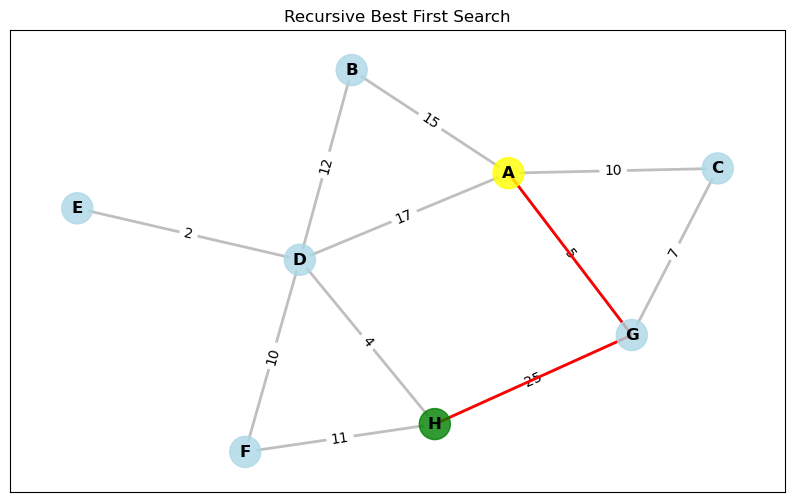

In [389]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))

# Compute heuristic values
heuristic_values = compute_heuristic()

# Perform Recursive Best First Search and print the path and path cost
path, path_cost = recursive_best_first_search(start_node, goal_node, heuristic_values)
if path:
    print("\nPath found:", ' -> '.join(path))
    print("Path cost:", path_cost)
else:
    print("\nNo path found.")

# Set labels for nodes
node_labels = {node: node for node in sorted(G.nodes)}

# Set edge labels
edge_labels = {(u, v): str(graph[u][v]) for u, v in G.edges}

# Draw the graph with customized settings
plt.figure(figsize=(10, 6))  # Set the figure size

pos = nx.kamada_kawai_layout(G)  # Set the layout algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Highlight the path
highlighted_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(nx_graph, pos, edgelist=highlighted_edges, edge_color='red', width=2)

# Show the graph on the screen
plt.title("Recursive Best First Search")
plt.show()

### 5.	Comparitive Analysis

In [381]:
#Code Block : Print the Time & Space complexity of Breadth First Search algorithm

# Measure time complexity
start_time = time.time()
path, path_cost = bfs(graph, start_node, goal_node)
end_time = time.time()

# Calculate and print the time complexity
time_complexity = end_time - start_time
print("\nTime Complexity: {:.8f} seconds".format(time_complexity))


# Calculate and print the space complexity
max_queue_size = max(len(queue) for queue in deque([deque()]))  # Initialize with an empty deque
space_complexity = sys.getsizeof(graph) + sys.getsizeof(set()) + max_queue_size * sys.getsizeof(tuple())
print("Space Complexity: {} bytes".format(space_complexity))

Iteration  Open List                                Closed List                              Goal Test
--------------------------------------------------------------------------------------------------------------
1          ()                                       (C)                                      False
2          (), (G)                                  (C), (C, A)                              False
3          (), (G), (B, D)                          (C), (C, A), (C, G)                      False
4          (), (G), (B, D), (D, H)                  (C), (C, A), (C, G), (C, A, B)           False
5          (), (G), (B, D), (D, H), (H)             (C), (C, A), (C, G), (C, A, B), (C, A, D) False
6          (), (G), (B, D), (D, H), (H), (E, F)     (C), (C, A), (C, G), (C, A, B), (C, A, D), (C, G, H) False
7          (), (G), (B, D), (D, H), (H), (E, F), (F) (C), (C, A), (C, G), (C, A, B), (C, A, D), (C, G, H), (C, A, D, E) True

Time Complexity: 0.00000000 seconds
Space Complexity:

In [382]:
#Code Block : Print the Time & Space complexity of Recursive Best First Search algorithm

# Measure time complexity
start_time = time.time()
path, path_cost = recursive_best_first_search(start_node, goal_node, heuristic_values)
end_time = time.time()

# Calculate and print the time complexity
time_complexity = end_time - start_time
print("Time Complexity: {:.8f} seconds".format(time_complexity))

# Calculate and print the space complexity
max_stack_size = 1  # Initialize with 1 to consider the first element in the stack
stack = [(start_node, [start_node], 0, 0)]
while stack:
    max_stack_size = max(max_stack_size, len(stack))
    node, path, f_limit, path_cost = stack.pop()
    successors = graph[node]
    if successors:
        sorted_successors = sorted(successors, key=lambda x: heuristic_values[x] + graph[node][x])
        open_list = [successor for successor in sorted_successors if successor not in path]
        for successor in open_list:
            new_f = heuristic_values[successor] + graph[node][successor]
            new_path = path + [successor]
            new_path_cost = path_cost + graph[node][successor]
            stack.append((successor, new_path, new_f, new_path_cost))

space_complexity = sys.getsizeof(graph) + sys.getsizeof(stack) + sys.getsizeof(max_stack_size * tuple())
print("Space Complexity: {} bytes".format(space_complexity))

Explored Nodes: C, G, H, F, D, E
Time Complexity: 0.00100923 seconds
Space Complexity: 456 bytes


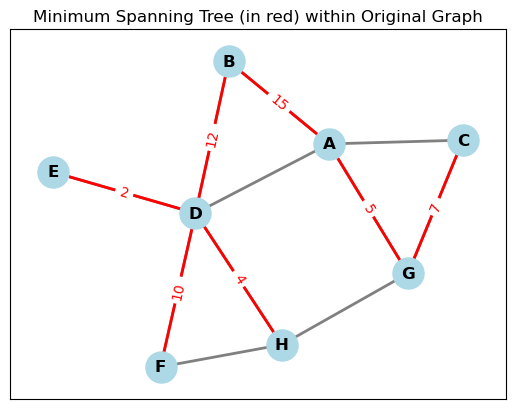

Minimum Spanning Tree:
D -- E (Cost: 2)
D -- H (Cost: 4)
A -- G (Cost: 5)
C -- G (Cost: 7)
D -- F (Cost: 10)
B -- D (Cost: 12)
A -- B (Cost: 15)
Minimum Spanning Tree Cost: 55


In [383]:
#Code Block : Using MST, find the minimum connections that keeps the whole network up and running

class DisjointSet:
    def __init__(self, vertices):
        self.parent = {}
        self.rank = {}
        for v in vertices:
            self.parent[v] = v
            self.rank[v] = 0

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        return self.parent[v]

    def union(self, v1, v2):
        root1 = self.find(v1)
        root2 = self.find(v2)
        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

def kruskal(graph):
    edges = []
    for v1 in graph:
        for v2, cost in graph[v1].items():
            edges.append((v1, v2, cost))
    edges.sort(key=lambda x: x[2])  # Sort edges by weight/cost

    vertices = set(graph.keys())
    disjoint_set = DisjointSet(vertices)
    minimum_spanning_tree = []

    for edge in edges:
        v1, v2, cost = edge
        if disjoint_set.find(v1) != disjoint_set.find(v2):
            disjoint_set.union(v1, v2)
            minimum_spanning_tree.append(edge)

    return minimum_spanning_tree

# Find the minimum spanning tree
minimum_spanning_tree = kruskal(graph)

# Create a NetworkX graph from the minimum spanning tree
G_mst = nx.Graph()
for edge in minimum_spanning_tree:
    v1, v2, cost = edge
    G_mst.add_edge(v1, v2, weight=cost)

# Draw the original graph with the minimum spanning tree highlighted
pos_mst = nx.kamada_kawai_layout(G)
edge_colors = ['gray' if G.has_edge(u, v) else 'gray' for u, v in G.edges]
nx.draw_networkx(G, pos_mst, with_labels=True, node_color='lightblue', node_size=500, font_size=12,
                 font_weight='bold', edge_color=edge_colors, width=2)
nx.draw_networkx_edges(G_mst, pos_mst, width=2, edge_color='red')
nx.draw_networkx_edge_labels(G_mst, pos_mst, edge_labels={(u, v): str(d['weight']) for u, v, d in G_mst.edges(data=True)},
                             font_size=10, font_color='red')
plt.title("Minimum Spanning Tree (in red) within Original Graph")
plt.show()

# Print the edges and cost of the minimum spanning tree
print("Minimum Spanning Tree:")
total_cost = 0
for edge in minimum_spanning_tree:
    v1, v2, cost = edge
    print(f"{v1} -- {v2} (Cost: {cost})")
    total_cost += cost
print("Minimum Spanning Tree Cost:", total_cost)

### 6.	Comparitive analysis or findings in below section

Comparison : BFS space complexity is higher as compared to RBFS. BFS (Breadth First Search) explores all nodes at a given depth level before moving to the next depth level, ensuring the shortest path but may have higher space complexity. RBFS (Recursive Best First Search) explores nodes based on heuristic values, reducing memory consumption but may not guarantee the shortest path.